O[INFO] [B200] Asking for clock rate 50.000000 MHz... 
[INFO] [B200] Actually got clock rate 50.000000 MHz.
[WARNING] [CORES] The requested decimation is odd; the user should expect CIC rolloff.
Select an even decimation to ensure that a halfband filter is enabled.
decimation = dsp_rate/samp_rate -> 5 = (50.000000 MHz)/(10.000000 MHz)

UUUUUUUUUUUUUUUUUUUUUOUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU

Sent waveform at frequency:  2430000000.0


UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU

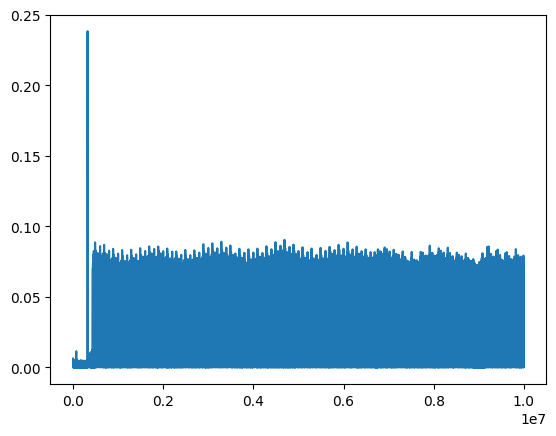

Sent waveform at frequency:  2440000000.0


UUUUUUUU

Sent waveform at frequency:  2450000000.0


U

Sent waveform at frequency:  2460000000.0


U

In [2]:
import uhd
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

usrp = uhd.usrp.MultiUSRP()

num_samps = 10000000 # number of samples received
center_freq = 2.41e9 # Hz
sample_rate = 10e6 # Hz
gain = 30 # dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
usrp.set_rx_gain(gain, 0)

def rx_thread():

    # Set up the stream and receive buffer
    st_args = uhd.usrp.StreamArgs("fc32", "sc16")
    st_args.channels = [0]
    metadata = uhd.types.RXMetadata()
    streamer = usrp.get_rx_stream(st_args)
    recv_buffer = np.zeros((1, 1000), dtype=np.complex64)

    # Start Stream
    stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
    stream_cmd.stream_now = True
    streamer.issue_stream_cmd(stream_cmd)

    # Receive Samples
    samples = np.zeros(num_samps, dtype=np.complex64)
    for i in range(num_samps//1000):
        streamer.recv(recv_buffer, metadata)
        samples[i*1000:(i+1)*1000] = recv_buffer[0]

    # Stop Stream
    stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
    streamer.issue_stream_cmd(stream_cmd)


    #np.fft.fft
    plt.plot(np.abs((samples)))
    plt.show()

def tx_thread():
    samples = 0.1*np.random.randn(1000000) + 0.1j*np.random.randn(1000000) # create random signal
    duration = .5 # seconds
    center_freq = [2.43e9, 2.44e9, 2.45e9, 2.46e9]
    sample_rate = 50e6
    gain = 70 # [dB] start low then work your way up
    for i in range(1):
        for freq in center_freq:
            usrp.send_waveform(samples, duration, 2.41e9, sample_rate, [0], gain)
            print("Sent waveform at frequency: ", freq)
            time.sleep(.1)

rx_thread = threading.Thread(target=rx_thread)
tx_thread = threading.Thread(target=tx_thread)

rx_thread.start()
tx_thread.start()



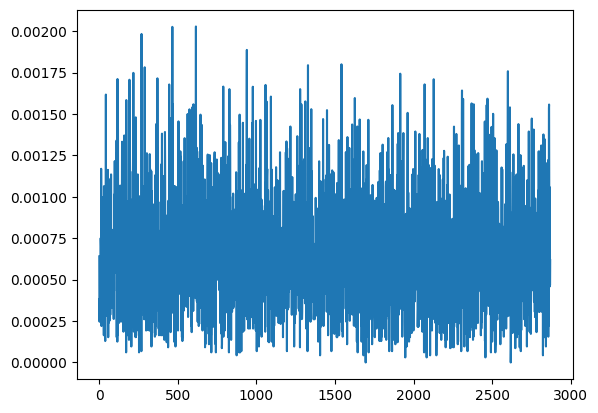

In [3]:

#np.fft.fft
plt.plot(np.abs((samples[387600+3800:397600-3330])))
plt.show()

Important Warning: (scalePhaseGradientToHz) No sampling frequency specified, using default Fs of 10.0Msps.
IMPORTANT WARNING: (bitFinderFromPhaseGradient) No sampling frequency specified, using default Fs of 10.0Msps.


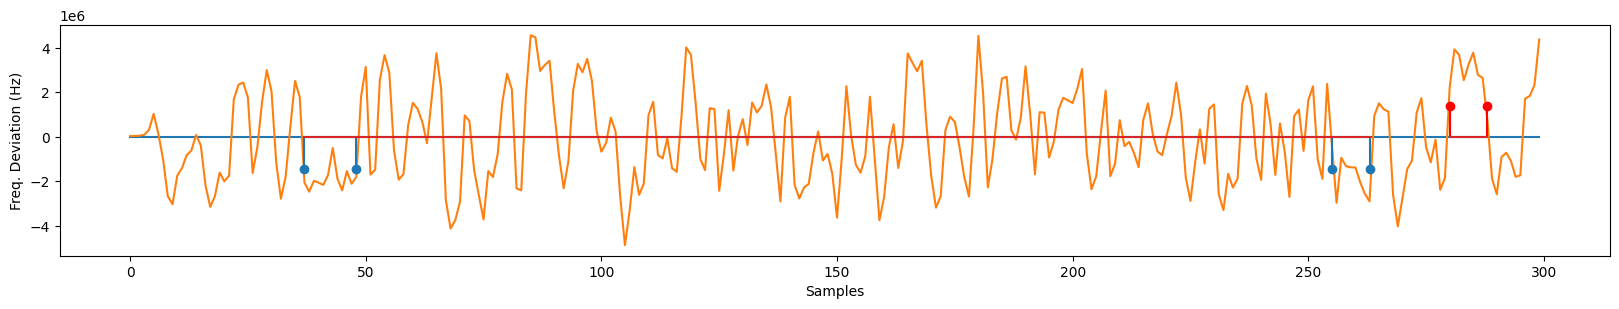

In [4]:
import IQ

iq = IQ.IQ(Fc= center_freq-5e3, Fs=sample_rate)

x = iq.apply(methods={

iq.bitFinderFromPhaseGradient: {'plot': True},
iq.scalePhaseGradientToHz: None,
iq.gradient: None,
iq.unwrapPhase: None,
iq.phase: None,
iq.butter: {"cutoff": 4e6},
iq.demodulate: None
},frame=samples[387600+3800:397600-3330][0:300])